In [1]:
import pandas as pd 
import numpy as np

In [2]:
data_path = "D:/learn ml algorithm/SAHeart.csv"

In [3]:
data = pd.read_csv(data_path)

In [4]:
data.head(5)

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [5]:
data.columns

Index(['row.names', 'sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea',
       'obesity', 'alcohol', 'age', 'chd'],
      dtype='object')

In [6]:
data.drop('row.names', axis = 1, inplace = True)

In [12]:
data.isnull().sum()

sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sbp        462 non-null    int64  
 1   tobacco    462 non-null    float64
 2   ldl        462 non-null    float64
 3   adiposity  462 non-null    float64
 4   famhist    462 non-null    object 
 5   typea      462 non-null    int64  
 6   obesity    462 non-null    float64
 7   alcohol    462 non-null    float64
 8   age        462 non-null    int64  
 9   chd        462 non-null    int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 36.2+ KB


In [17]:
data.select_dtypes(include = "object")

,famhist
0,Present
1,Absent
2,Present
3,Present
4,Present
...,...
457,Absent
458,Absent
459,Absent
460,Absent


In [21]:
data['famhist'].value_counts()

famhist
Absent     270
Present    192
Name: count, dtype: int64

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

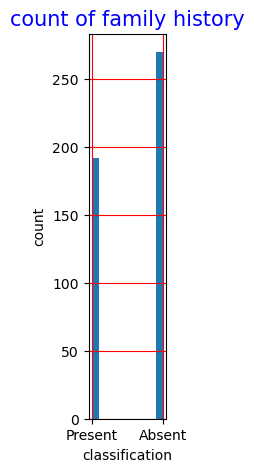

In [71]:
plt.figure(figsize = (1,5))

plt.hist(data['famhist'])

font1 = {'color':"blue", 'size':15}
font2 = {"color":"black", 'size':10}
plt.xlabel("classification", fontdict = font2)
plt.ylabel("count", fontdict = font2)
plt.title("count of family history", fontdict = font1)
plt.grid(color = "red")

plt.show()

In [76]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [77]:
data["famhist_new"] = le.fit_transform(data['famhist'])

In [78]:
data.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd,famhist_new
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1,0
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0,1
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1,1


In [85]:
data.drop("famhist", axis = 1, inplace = True)

In [101]:
data.groupby(['famhist_new','chd'])['chd'].count().reset_index(name = 'count')

,famhist_new,chd,count
0,0,0,206
1,0,1,64
2,1,0,96
3,1,1,96


In [102]:
data.head()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd,famhist_new
0,160,12.00,5.73,23.11,49,25.30,97.20,52,1,1
1,144,0.01,4.41,28.61,55,28.87,2.06,63,1,0
2,118,0.08,3.48,32.28,52,29.14,3.81,46,0,1
3,170,7.50,6.41,38.03,51,31.99,24.26,58,1,1
4,134,13.60,3.50,27.78,60,25.99,57.34,49,1,1


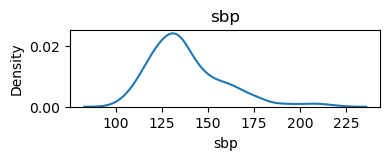

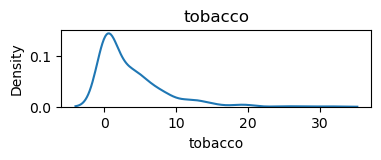

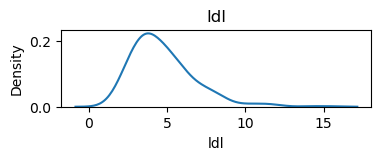

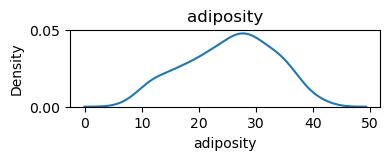

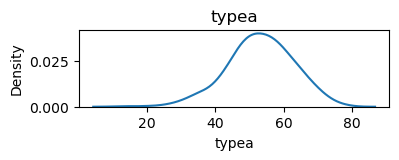

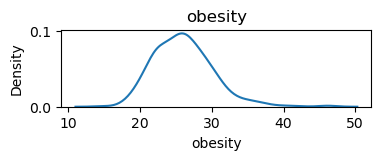

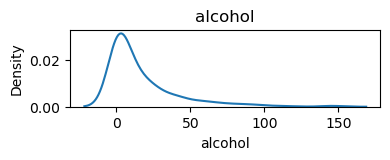

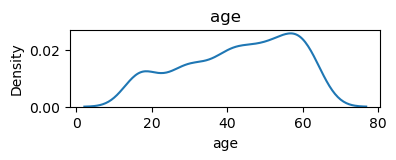

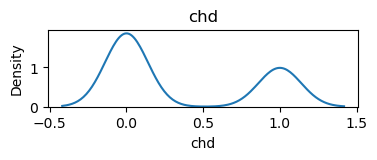

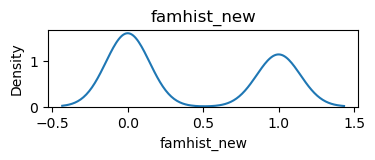

In [129]:
for i in data.columns:
    plt.figure(figsize = (4,1))

    sns.kdeplot(data[i])
    plt.title(i)

    plt.show()

In [130]:
data['chd'].value_counts()

chd
0    302
1    160
Name: count, dtype: int64

In [137]:
data.groupby(['chd','famhist_new'])['famhist_new'].count().reset_index(name = "count")

,chd,famhist_new,count
0,0,0,206
1,0,1,96
2,1,0,64
3,1,1,96


In [138]:
data.head()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd,famhist_new
0,160,12.00,5.73,23.11,49,25.30,97.20,52,1,1
1,144,0.01,4.41,28.61,55,28.87,2.06,63,1,0
2,118,0.08,3.48,32.28,52,29.14,3.81,46,0,1
3,170,7.50,6.41,38.03,51,31.99,24.26,58,1,1
4,134,13.60,3.50,27.78,60,25.99,57.34,49,1,1


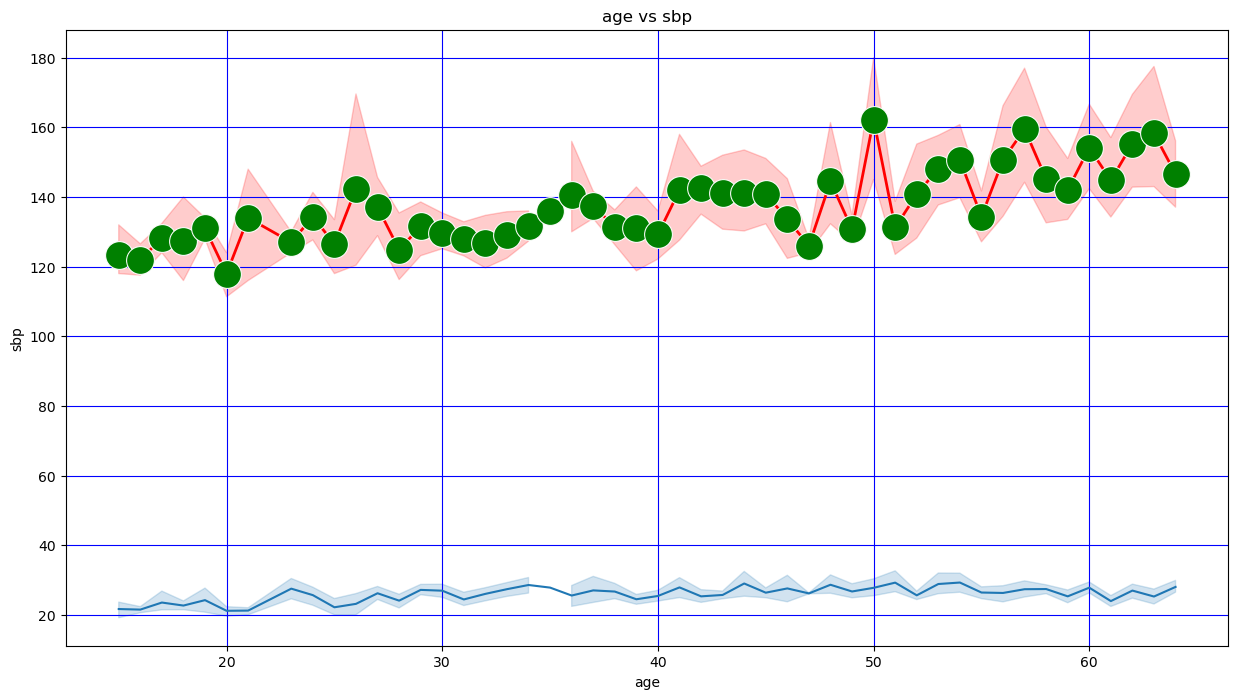

In [160]:
plt.figure(figsize = (15, 8))
sns.lineplot(x = 'age', y = 'sbp', data = data, marker = "o", linewidth = 2, color = 'r', ms = 20, mfc = 'green')
sns.lineplot(x = "age", y = "obesity", data = data)

plt.title("age vs sbp")
plt.grid(color = "blue")
plt.show()

In [162]:
tar = data['obesity']
val = data.drop('obesity', axis = 1)

In [163]:
from sklearn.model_selection import train_test_split

In [164]:
tr_data, ts_data, tr_lab, ts_lab = train_test_split(val, tar, test_size = 0.20, random_state= 22)

In [171]:
print(tr_data.shape)
print(tr_lab.shape)
print(ts_data.shape)
print(ts_lab.shape)

(369, 9)
(369,)
(93, 9)
(93,)


In [172]:
from sklearn.linear_model import LinearRegression

In [173]:
model = LinearRegression()

In [174]:
model.fit(tr_data, tr_lab)

LinearRegression()

In [175]:
tr_pre = model.predict(tr_data)
ts_pre = model.predict(ts_data)

In [176]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [177]:
root_mean_squared_error(tr_lab, tr_pre)

2.8054647522426324

In [178]:
mean_absolute_error(tr_lab, tr_pre)

1.8677184331600838

In [179]:
mean_absolute_percentage_error(tr_lab, tr_pre)

0.07190764371892908

In [180]:
print(root_mean_squared_error(ts_lab, ts_pre))
print(mean_absolute_error(ts_lab, ts_pre))
print(mean_absolute_percentage_error(ts_lab, ts_pre))

2.675693837838792
2.0049239105142695
0.07664336769283954
